# Tarea Semanal 3

## Modelizando un ADC

### Introduccion

En este trabajo vamos a realizar la simulacion digital de un ADC para lo cual estamos generando una se침al senoidal a la cual le vamos a agregar un ruido analogico. Luego de obtenida la se침al con la que estamos trabajando queremos cuantizarla de esta manera simulando el trabajo que realiza un ADC al colocarle una se침al para que esta pase del terreno analogico al digital. 

Esto nos permite llevar una se침al tomada por un aparato, como por ejemplo un sensor, y luego trabajarla digitalmente interpretando una interrupcion del mismo. Veamos como llevamos esto en nuestro codigo

## a) Generar el siguiente resultado producto de la experimentaci칩n. B = 4 bits, kn=1


Vamos a generar el codigo en Spyder requerido para esto. El codigo se encuentra comentado indicando que se hizo en cada paso. En posteriores iteraciones del codigo vamos a remover los comentarios para comprimir dicho codigo


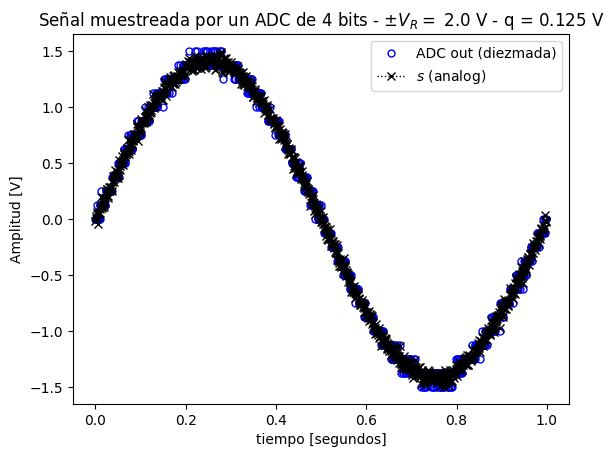

Text(0.5, 0, 'Pasos de cuantizaci칩n (q) [V]')

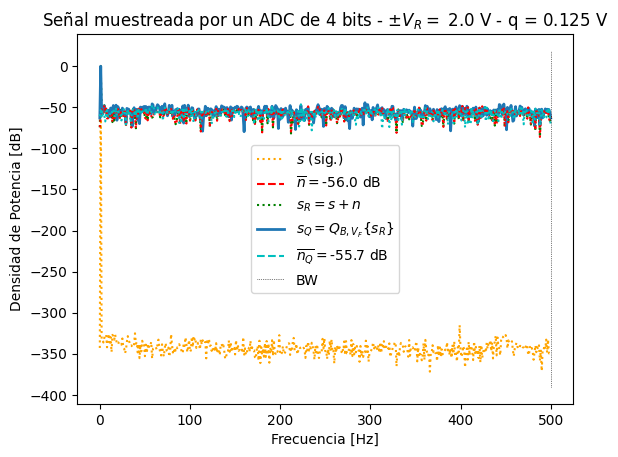

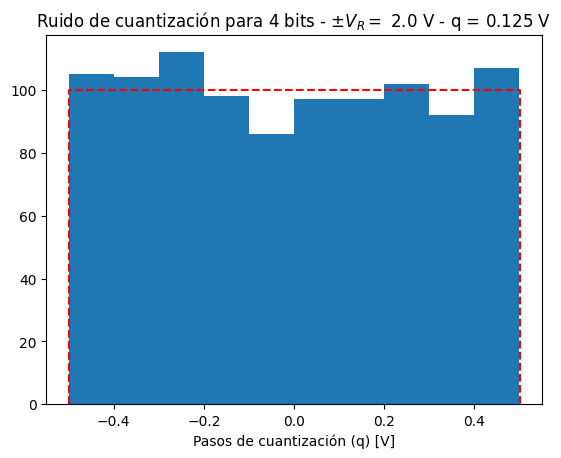

In [1]:
#%% 

""" 

TAREA SEMANAL 3 - Modelizado de un ADC

"""

#%% m칩dulos y funciones a importar

import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

#%% Datos de la simulaci칩n

fs = 1000           # frecuencia de muestreo (Hz)
N = 1000            # cantidad de muestras

# Datos del ADC 
B =  4             # bits
Vf = 2             # rango sim칠trico de +/- Vf Volts ; esto seria +- Vref
q = (Vf/2**(B-1))/2     # paso de cuantizaci칩n de q Volts 2 a la b-1


# datos del ruido (potencia de la se침al normalizada, es decir 1 W)
# Esta potencia la obtenemos al asegurar varianza 1

pot_ruido_cuant = q**2 / 12                 # Watts, esto va a ser la varianza de mi se침al de ruido 
kn = 1                                      # Escala de la potencia de ruido anal칩gico
pot_ruido_analog = pot_ruido_cuant * kn     # Ahora, con esto podemos escalar el ruido para aumentar o disminuir

ts = 1/fs           # tiempo de muestreo
df = fs/N           # resoluci칩n espectral

#%% Genero mi se침al senoidal

# Amplitud,         Amplitud maxima
# f0,               Frecuencia de la se침al
# Fase,             Fase de la se침al
# Num_Muestras      Cantidad de muestras tomadas por el ADC
# Fs,               Frecuencia de muestreo

def Generador_Senoidal ( Amplitud, f0, Fase, Num_Muestras, fs ):
    
    # Calculamos el tiempo de sampleo
    ts = 1/fs
    
    # Grilla de sampleo temporal
    tt = np.linspace(0, (Num_Muestras-1)*ts, Num_Muestras)
    
    Seno_Generado = Amplitud * np.sin( 2 * np.pi * f0 * tt + Fase )
    
    return tt, Seno_Generado

#%% Busco los valores para los cuales esta senoidal esta normalizada, es decir que la se침al tiene una varianza = 1

# Como la varianza es una senoidal es x(t) = A sen ( wt + phi ), la varianza va a estar dada por Var(x) = A^2 * 1/2 

A = np.sqrt(2)
Vmed = 0
f0 = fs/N
Phi = 0    

tt,analog_sig = Generador_Senoidal( Amplitud= A, f0= f0, Fase= Phi, Num_Muestras= N, fs= fs )

# tt es la grilla temporal

varianza = np.var(analog_sig)

# Compruebo que la varianza es =1, entonces ya tengo mi se침al normalizada en este punto

#%% Ahora, queremos sumar la se침al de ruindo a esta senoidal

# Para poder general la se침al de ruido, tenemos que tener una distribucion normal con un N(o,sigma)

Media = 0                   # Media
Sigma2 = pot_ruido_analog   # Varianza
SD_Sigma = np.sqrt(Sigma2)  # Desvio standar 

# Recuerdo que la pot del ruido es= q^2/12

# Genero se침al de ruido
nn = np.random.normal(Media, SD_Sigma, N)

varianza_ruido = np.var(analog_sig)

# Compruebo que la varianza es =1, entonces ya tengo mi se침al de ruido normalizada en este punto

#%% Ahora genero mi se침al de entrada al ADC

# Se침ales

# analog_sig ,  se침al anal칩gica sin ruido
# nn ,          se침al de ruido

# se침al anal칩gica de entrada al ADC (con ruido anal칩gico)

sr = analog_sig + nn

# Observacion; como tengo una se침al normalizada a la que luego de sumo un ruido. Puedo hacer esto
# ya que, este ruido obedece una distribucion normal con el sigma cuadrado

#%% Ya con la se침al de ruido, vamos a cuantizarla

# Uso la funcion redondeo para aproximar el valor mas cercano de la funcion de ruido que estoy pasando 

# se침al cuantizada sin escala original adimensional ( Si veo el grafico ac치 la escala esta en divisiones )
srq_1 = np.round(sr/q)

# Se침al cuantizada llevada a escala original ( Con esto la vuelvo a llevar a +- 3v )
srq = srq_1 * q

# nn =  # se침al de ruido de anal칩gico
# nq =  # se침al de ruido de cuantizaci칩n

nq = sr - srq

#%% Visualizaci칩n de resultados

# cierro ventanas anteriores
plt.close('all')

##################
# Se침al temporal
##################

plt.figure(1)

plt.plot(tt, srq, lw=2, linestyle='', color='blue', marker='o', markersize=5, markerfacecolor='blue', markeredgecolor='blue', fillstyle='none', label='ADC out (diezmada)')
plt.plot(tt, sr, lw=1, color='black', marker='x', ls='dotted', label='$ s $ (analog)')

plt.title('Se침al muestreada por un ADC de {:d} bits - $\pm V_R= $ {:3.1f} V - q = {:3.3f} V'.format(B, Vf, q) )
plt.xlabel('tiempo [segundos]')
plt.ylabel('Amplitud [V]')
axes_hdl = plt.gca()
axes_hdl.legend()
plt.show()


###########
# Espectro
###########

# En esta parte usamos la FFT para poder tranformar las se침ales usando la FFT
# Los numeros que vamos a tener en ft_SR son numeros complejos, ya que, estamos usando FFT

plt.figure(2)
ft_SR = 1/N*np.fft.fft( sr )
ft_Srq = 1/N*np.fft.fft( srq )
ft_As = 1/N*np.fft.fft( analog_sig )
ft_Nq = 1/N*np.fft.fft( nq )
ft_Nn = 1/N*np.fft.fft( nn )

# grilla de sampleo frecuencial
ff = np.linspace(0, (N-1)*df, N)

bfrec = ff <= fs/2 
# Con esto eliminamos la mitad del vector de la FFT asi eliminamos las redundancias
# Este es un vector booleano que tiene True hasta N/2 valores y luego son todos False. 
# Ya que, la otra parte es simetrica

Nnq_mean = np.mean(np.abs(ft_Nq)**2)
nNn_mean = np.mean(np.abs(ft_Nn)**2)

plt.plot( ff[bfrec], 10* np.log10(2*np.abs(ft_As[bfrec])**2), color='orange', ls='dotted', label='$ s $ (sig.)' )
plt.plot( np.array([ ff[bfrec][0], ff[bfrec][-1] ]), 10* np.log10(2* np.array([nNn_mean, nNn_mean]) ), '--r', label= '$ \overline{n} = $' + '{:3.1f} dB'.format(10* np.log10(2* nNn_mean)) )
plt.plot( ff[bfrec], 10* np.log10(2*np.abs(ft_SR[bfrec])**2), ':g', label='$ s_R = s + n $' )
plt.plot( ff[bfrec], 10* np.log10(2*np.abs(ft_Srq[bfrec])**2), lw=2, label='$ s_Q = Q_{B,V_F}\{s_R\}$' )
plt.plot( np.array([ ff[bfrec][0], ff[bfrec][-1] ]), 10* np.log10(2* np.array([Nnq_mean, Nnq_mean]) ), '--c', label='$ \overline{n_Q} = $' + '{:3.1f} dB'.format(10* np.log10(2* Nnq_mean)) )
plt.plot( ff[bfrec], 10* np.log10(2*np.abs(ft_Nn[bfrec])**2), ':r')
plt.plot( ff[bfrec], 10* np.log10(2*np.abs(ft_Nq[bfrec])**2), ':c')
plt.plot( np.array([ ff[bfrec][-1], ff[bfrec][-1] ]), plt.ylim(), ':k', label='BW', lw = 0.5  )

plt.title('Se침al muestreada por un ADC de {:d} bits - $\pm V_R= $ {:3.1f} V - q = {:3.3f} V'.format(B, Vf, q) )
plt.ylabel('Densidad de Potencia [dB]')
plt.xlabel('Frecuencia [Hz]')
axes_hdl = plt.gca()
axes_hdl.legend()

#############
# Histograma
#############

plt.figure(3)
bins = 10
plt.hist(nq.flatten()/(q), bins=bins)
plt.plot( np.array([-1/2, -1/2, 1/2, 1/2]), np.array([0, N/bins, N/bins, 0]), '--r' )
plt.title( 'Ruido de cuantizaci칩n para {:d} bits - $\pm V_R= $ {:3.1f} V - q = {:3.3f} V'.format(B, Vf, q))

plt.xlabel('Pasos de cuantizaci칩n (q) [V]')


### Analicemos lo obtenido 

En el primer grafico podemos ver la se침al que ha sido cuantizada por nuestro ADC. En la cual podemos ver las aproximaciones que se han realizado para acercarse a los valores permitidos por el ADC de 4 Bits, esto implica que tenemos menos divisiones horizontales, o niveles de energia a los cuales el ADC puede aproximar a la se침al, lo que hace que nuestra resolucion sea limitada. Si aumentamos los Bits, vamos a tener mas posibilidades de tener mas valores en los cuales el ADC puede aproximar a la se침al. 

En el segundo grafico podemos observar el grafico de densidad de potencia de la se침al que hemos cuantizado. Como podemos pensar esto ?

En primera instancia, tenemos un pico ubicado a 1 hz que va a ser la densidad de potencia del seno de 1 hz que estamos muestreando con el ADC. Es decir, toda la potencia de nuestra se침al se esta ubicando all칤. 
Por otro lado, si la se침al esta ubicada en 1 hz, porque seguimos teniendo un grafico de la se침al en el resto del espectro ? Esto se debe a que como estamos agregando una se침al de ruido, esta es valida para todo el espectro. Por ese motivo, tenemos a nuestro pico en 1 hz y en el resto del espectro tenemos el ruido analogico que esta siendo representado por el ADC. 

Adicionalmente observamos que tenemos 3 pisos de ruido. El analogico, digital y el de la representacion que podemos ver en colores rojo, azul y amarillo respectivamente. 
Los primeros 2 estan dados por como estamos representando a la se침al en la parte analogica, es decir, como seria nuestro aparato f칤sico que esta tomando la se침al y que ruido mete a la se침al que originalmente queremos representar. Luego, el digital esta originado cuando queremos digitalizar esa se침al que estamos tomando analogicamente. 
Pensemoslo de esta manera, imaginemos que queremos tomar la se침al cardiaca de una persona. Para ello, vamos a tener un aparato que colocamos en ella que va a ser el encargado de recolectar dicha se침al; el ruido que es generado por esta parte es el piso de ruido analogico. Por otro lado, una vez tomamos la se침al con nuestra circuiteria y la conectamos al ADC para digitalizarla vamos a tener un ruido generado por la propia representacion del ADC al aproximar a la se침al a uno de los posibles valores que este puede tomar, esto va a dar nuestro piso de ruido digital.

En este caso, podemos observar que ambos ruidos estan al mismo nivel ( aproximadamente - 40dB ). Esto es de especial utilidad, ya que, si nos esforzamos por tener una circuiteria muy robusta que no genere ruido al tomar la se침al pero nuestro ADC no es de buena calidad todo ese esfuerzo se ve opacado por el ruido digital que va a provocar el ADC. Esto es debido a que pido de ruido mas alto que tengamos va a determinar el ruido de la representacion de la se침al, por lo que, en este caso si el piso de ruido digital fuese 20 db mas alto que en el analogico, la se침al de salida va a estar representada por este ruido digital mas alto, por mas que el analotico sea mucho menos. 

Ahora, a que hace referencia el piso de ruido amarillo ? Esto es el propio ruido que vamos a tener por la representacion de nuestra se침al en la computadora. En el caso de sistemas con un hardware potente, es un ruido muy peque침o ( -350 db ) debido a que el ruido que pone esta representacion es muy peque침o. Ac치 podemos lo que hablamos antes, donde por mas que este ruido es mucho menor que los otros 2 la se침al de salida va a estar determinada por el piso de ruido mas alto que tengamos. 

Finalmente, el ultimo grafico vemos que el ruido de nuestra cuantizaci칩n tiene una distribucion uniforme. Por mas, que el ruido analogico que originalmente sumamos a la se침al obedece a una distribucion normal. Es decir, que por mas que no generamos un ruido con una distribucion uniforme el resultado que obtuvimos es igual a lo que vimos en la teoria que indica este resultado. 



## b) Analizar para una de las siguientes configuraciones B = 퍆{4, 8 y 16} bits, kn={1/10,1,10}. Discutir los resultados respecto a lo obtenido en a).

Generemos los codigos para obtener estas representaciones:

Disclaimer, me ayude con chat GPT para generar los subplots para cada una de las combinaciones

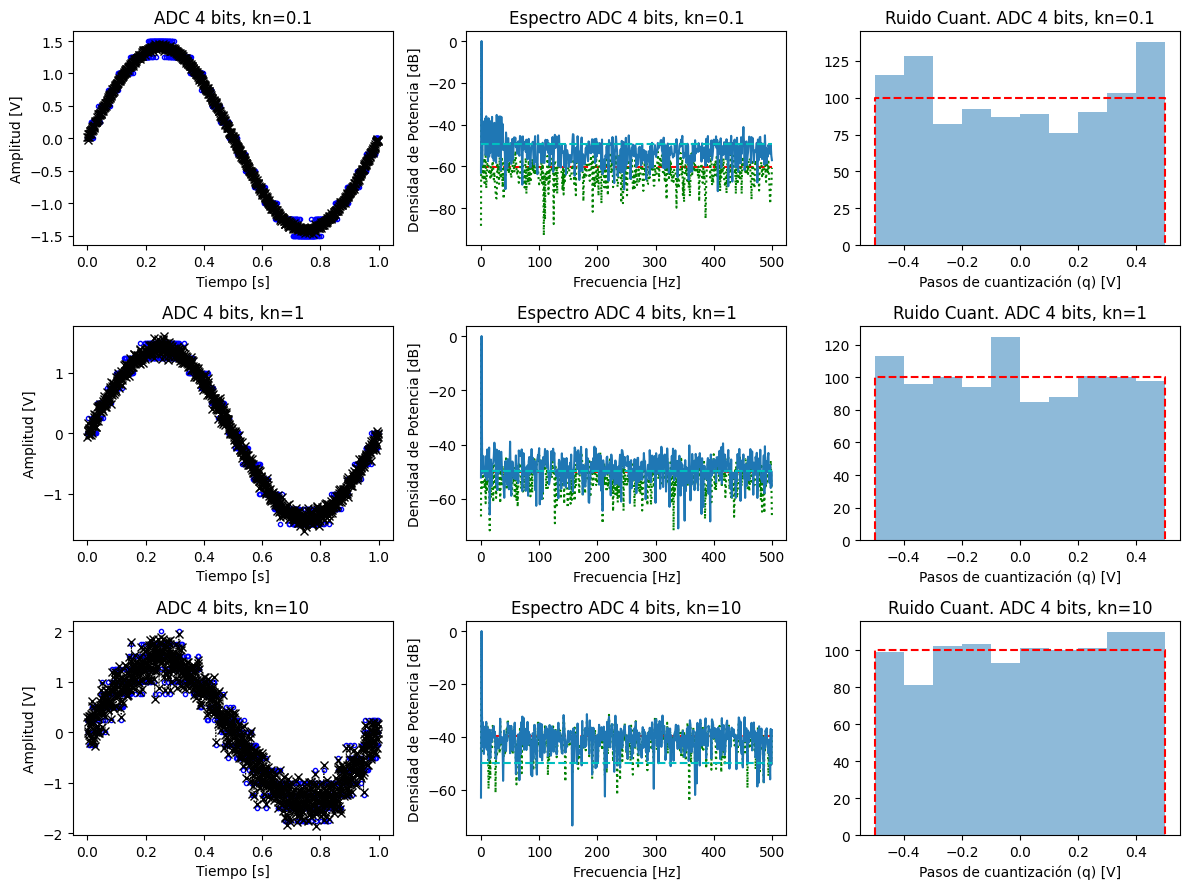

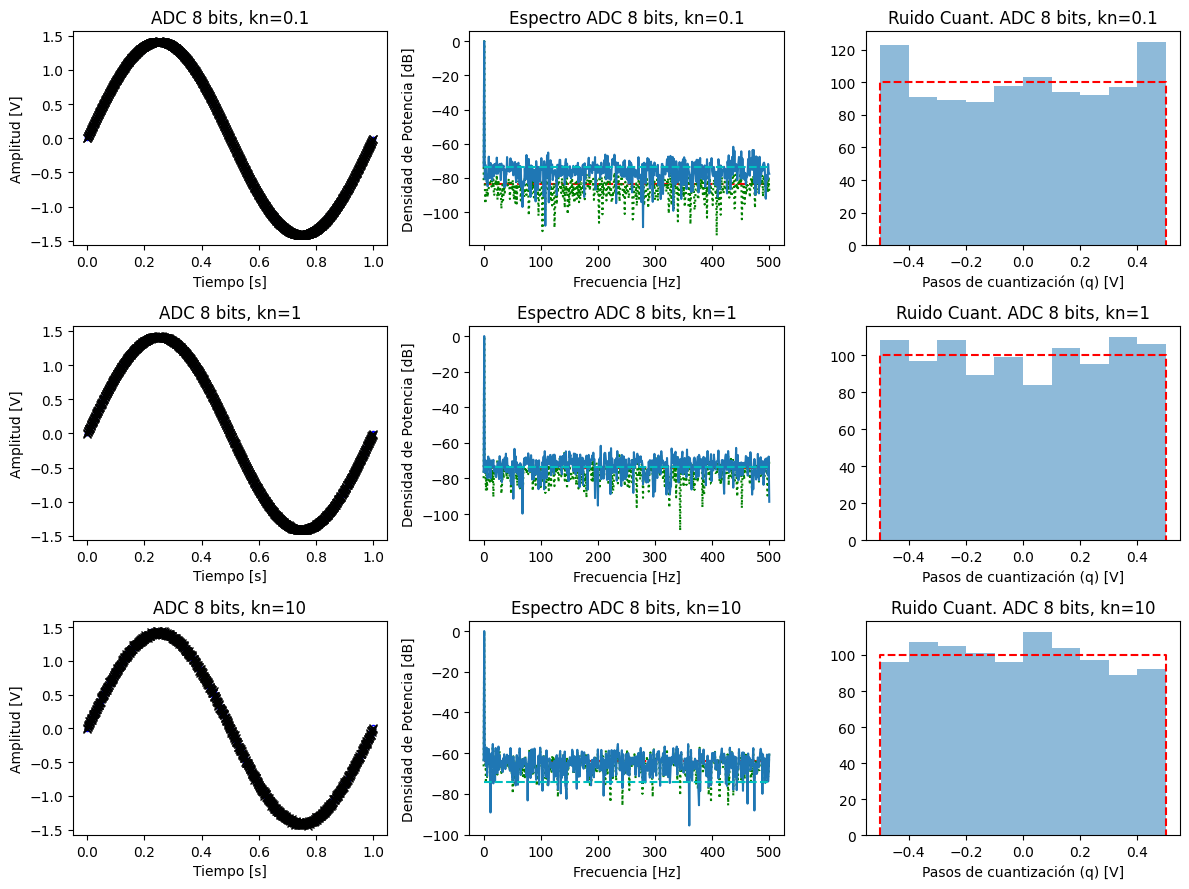

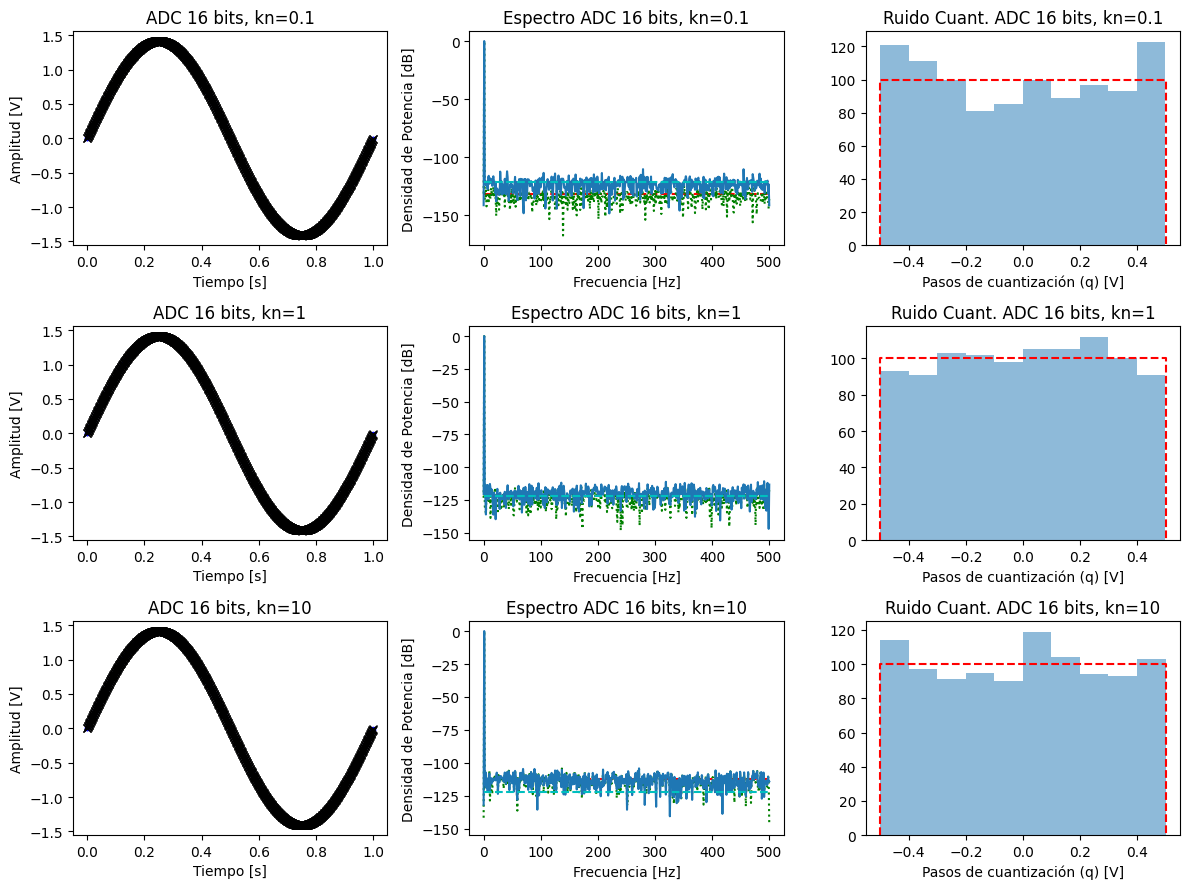

In [13]:
import numpy as np
import matplotlib.pyplot as plt

def generar_graficos(B):
    # Datos de la simulaci칩n
    fs = 1000  # Frecuencia de muestreo (Hz)
    N = 1000   # Cantidad de muestras
    kn_valores = [1/10, 1, 10]  # Escala de la potencia de ruido anal칩gico
    Vf = 2  # Rango sim칠trico de +/- Vf Volts

    ts = 1/fs  # Tiempo de muestreo
    df = fs/N  # Resoluci칩n espectral
    
    # Generador de se침al senoidal
    def Generador_Senoidal(Amplitud, f0, Fase, Num_Muestras, fs):
        ts = 1/fs
        tt = np.linspace(0, (Num_Muestras-1)*ts, Num_Muestras)
        Seno_Generado = Amplitud * np.sin(2 * np.pi * f0 * tt + Fase)
        return tt, Seno_Generado

    A = np.sqrt(2)
    f0 = fs/N
    Phi = 0    
    tt, analog_sig = Generador_Senoidal(Amplitud=A, f0=f0, Fase=Phi, Num_Muestras=N, fs=fs)

    q = Vf / 2**(B-1)  # Paso de cuantizaci칩n
    pot_ruido_cuant = q**2 / 12  # Potencia del ruido de cuantizaci칩n
    
    # Crear figura con 3 filas y 3 columnas
    fig, axs = plt.subplots(3, 3, figsize=(12, 9))

    for j, kn in enumerate(kn_valores):
        pot_ruido_analog = pot_ruido_cuant * kn  # Escalar el ruido anal칩gico
        
        # Generaci칩n de ruido
        Media = 0
        Sigma2 = pot_ruido_analog
        SD_Sigma = np.sqrt(Sigma2)
        nn = np.random.normal(Media, SD_Sigma, N)
        
        # Se침al de entrada al ADC con ruido
        sr = analog_sig + nn  
        
        # Cuantizaci칩n
        srq_1 = np.round(sr / q)
        srq = srq_1 * q  # Se침al cuantizada
        nq = sr - srq  # Ruido de cuantizaci칩n
        
        # Se침al temporal
        axs[j, 0].plot(tt, srq, lw=1.5, linestyle='', color='blue', marker='o', markersize=3, fillstyle='none')
        axs[j, 0].plot(tt, sr, lw=0.8, color='black', marker='x', ls='dotted')
        axs[j, 0].set_title(f'ADC {B} bits, kn={kn}')
        axs[j, 0].set_xlabel('Tiempo [s]')
        axs[j, 0].set_ylabel('Amplitud [V]')
        
        # Espectro
        ft_SR = 1/N * np.fft.fft(sr)
        ft_Srq = 1/N * np.fft.fft(srq)
        ft_Nq = 1/N * np.fft.fft(nq)
        ft_Nn = 1/N * np.fft.fft(nn)
        
        # Grilla de frecuencia
        ff = np.linspace(0, (N-1)*df, N)
        bfrec = ff <= fs/2  # Filtrado de la mitad redundante
        
        # Promedios para la densidad de potencia
        Nnq_mean = np.mean(np.abs(ft_Nq)**2)
        nNn_mean = np.mean(np.abs(ft_Nn)**2)
        
        axs[j, 1].plot([ff[bfrec][0], ff[bfrec][-1]], 10*np.log10(2*np.array([nNn_mean, nNn_mean])), '--r')
        axs[j, 1].plot(ff[bfrec], 10*np.log10(2*np.abs(ft_SR[bfrec])**2), ':g')
        axs[j, 1].plot(ff[bfrec], 10*np.log10(2*np.abs(ft_Srq[bfrec])**2), lw=1.5)
        axs[j, 1].plot([ff[bfrec][0], ff[bfrec][-1]], 10*np.log10(2*np.array([Nnq_mean, Nnq_mean])), '--c')
        axs[j, 1].set_title(f'Espectro ADC {B} bits, kn={kn}')
        axs[j, 1].set_xlabel('Frecuencia [Hz]')
        axs[j, 1].set_ylabel('Densidad de Potencia [dB]')
        
        # Histograma
        bins = 10
        axs[j, 2].hist(nq.flatten() / q, bins=bins, alpha=0.5)
        axs[j, 2].plot([-1/2, -1/2, 1/2, 1/2], [0, N/bins, N/bins, 0], '--r')
        axs[j, 2].set_title(f'Ruido Cuant. ADC {B} bits, kn={kn}')
        axs[j, 2].set_xlabel('Pasos de cuantizaci칩n (q) [V]')

    # Ajuste de dise침o
    plt.tight_layout()
    plt.show()

# Generar gr치ficos para cada B
for B in [4, 8, 16]:
    generar_graficos(B)

En este caso, sacamos el ruido de la representacion de los graficos de densidad de potencia asi tenemos una mejor una mejor vision de los pisos de ruido analogico y digital.

Ahora, podemos ver que a medida que aumentamos los Bits del ADC mejora enormemente la digitalizacion de la se침al. Y como en este caso tenemos que el ruido analogico esta relacionado con los bits debido a que:

 $$ q = \frac{V_f}{2^{B-1}} $$ 
$$ pot-ruido-cuant = \frac{q^2}{12} $$

Entonces, a una mayor cantidad de bits menor va a ser la influenvia del ruido en la salida de nuestra se침al. Por esto, vemos que con 4 bits y Kn = 1 los pisos de ruido estan aproximadamente en -50 dB, pero en cambio con 16 bits y Kn = 1 observamos al piso en aproximadamente -120 dB. Esto es enormemente mejor teniendo un ruido que es 7 ordenes de magnitud menor con un ADC de 16 bits. 

Por otro lado, al cambiar al Kn vemos que los pisos de ruido ya no estan alineados y dependiendo el valor vamos a tener el piso analogico mas arriba o el digital mas arriba. Esto encadena con lo ante mencionado, en donde no importa que un piso sea menor que el otro ya que la se침al de salida ( En azul ) va a estar determinada por el piso mas alto. Adicionalmente, al ir teniendo ruidos mas atenuados con el aumento de los Bits del ADC la se침al de salida es mas uniforme ya que la presencia del ruido es menor. Esto tambien lo vemos claramente en los graficos de la se침al cuantizada que mas Bits el grafico es mas parecido a la senoidal que estamos generando originalmente.

Tambien vemos que en todos los casos la distribucion del ruido de cuantizacion se parece a una uniforme, pero a mas Bits mejor es este parecido. En donde observamos que los Bins estan mas cerca de la linea que marca la caja de la uniforme. 

## Conclusion 

De todo esto puedo destacar 3 grandes puntos que pude analizar luego de realizar estas representaciones:

1) Es importante que los pisos de ruido analogico y digital sean lo mas parecidos posibles. Esto debido a que, no vale la pena esforzarse para tener uno mas bajo que el otro ya que a la hora de representar a la se침al esta va a estar limitada por el ruido que sea mas alto. Es decir, que al dise침ar un sistema digitalice una se침al voy a tener en cuenta cual parte va a estar metiendo mas ruido segun lo que tengo disponible y en consecuencia dise침ar la otra parte acorde a esta limitante que tengo

2) Es bueno invertir en tener mas Bits en nuestro ADC, ya que pude ver a simple vista que pasando de 4 a 16 bits se redujo enormemente la influencia del ruido, siendo 7 ordenes de magnitudes menor al tener mas Bits. Teniendo en cuenta lo anterior, si mi parte analogica me limita poniendo un ruido mayor ahi si no invertiria con mas Bits, sino pondria los acorde a la limitante del sistema

3) Me sorprendi칩 ver que a pesar de no haber puesto un ruido con distribucion uniforme, este emergi칩 al cuantizar la se침al tal y como indicaba la teoria. Es ver algo que veiamos en los libros traido a la realidad





## Bonus

###游눑 Encontrar la relaci칩n entre la cantidad de B bits del ADC y el SNR de la se침al digitalizada. (Ver Holton. DSP Principles and App. 6.7 ADC Quantization pag. 387 )

Se puede ver que la relacion entre la cantidad de bits del ADC y el Signal to Noise Ratio esta dada por la siguiente formula:

$$ SNR \approx (6,02*Bits) + 1,76 [dB] $$

Esto implica que mientras mas Bits tengamos mas alto es el SNR:

$$ 8 Bits \Rightarrow SNR \approx (6,02*8) + 1,76 = 48,92 db $$
$$ 16 Bits \Rightarrow SNR \approx (6,02*8) + 1,76 = 98,08 db $$

Y queremos que el SNR sea lo mas alto posible, ya que, esto implica que la se침al es mucho mas fuerte que el ruido. Recordemos que le SNR esta dado por:

$$ SNR = 10 \log_{10} \left( \frac{P_{\text{se침al}}}{P_{\text{ruido}}} \right) $$

Con todo esto podemos ver que duplicar la cantidad de bits reduce el error de cuantizacion lo que hace que la calidad de la se침al de salida sea mucho mejor respecto al ruido. De esta manera y como vimos anteriormente en los graficos de nuestro ADC, la se침al de salida con un ADC de 16 Bits es mucho mejor que con uno de 4 Bits

### 游뱚 Simular el efecto del aliasing junto con el muestreo.

El efecto del aliasing viene dado cuando queremos muestrear una se침al pero no seguimos el teorema del muestreo, en el cual, tomamos la precaucion que la frecuencia de muestreo sea mayor que el doble de nuestra frecuencia $ f_s \geq 2*f_0 $. A esto lo habiamos llamado la precuencia de Nyquist.

De esta manera, nos aseguramos que espectralmente no estemos solapando las repeticiones periodicas que vamos a tener del espectro de la se침al y as칤 no estamos pisando informacion.

Entonces, si no respetamos esta frecuencia de sampleo van a ocurrir los llamados efectos de aliasing. 

Vamos a simularlo:

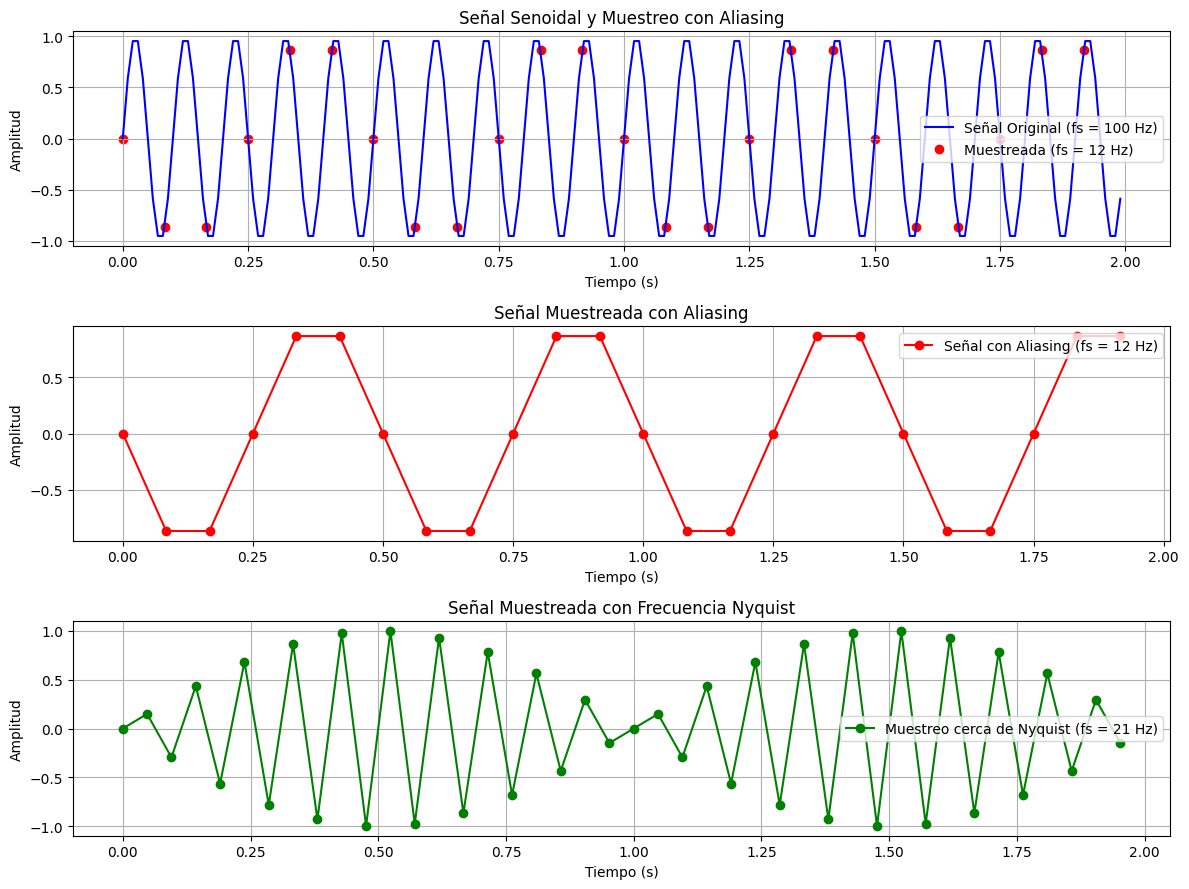

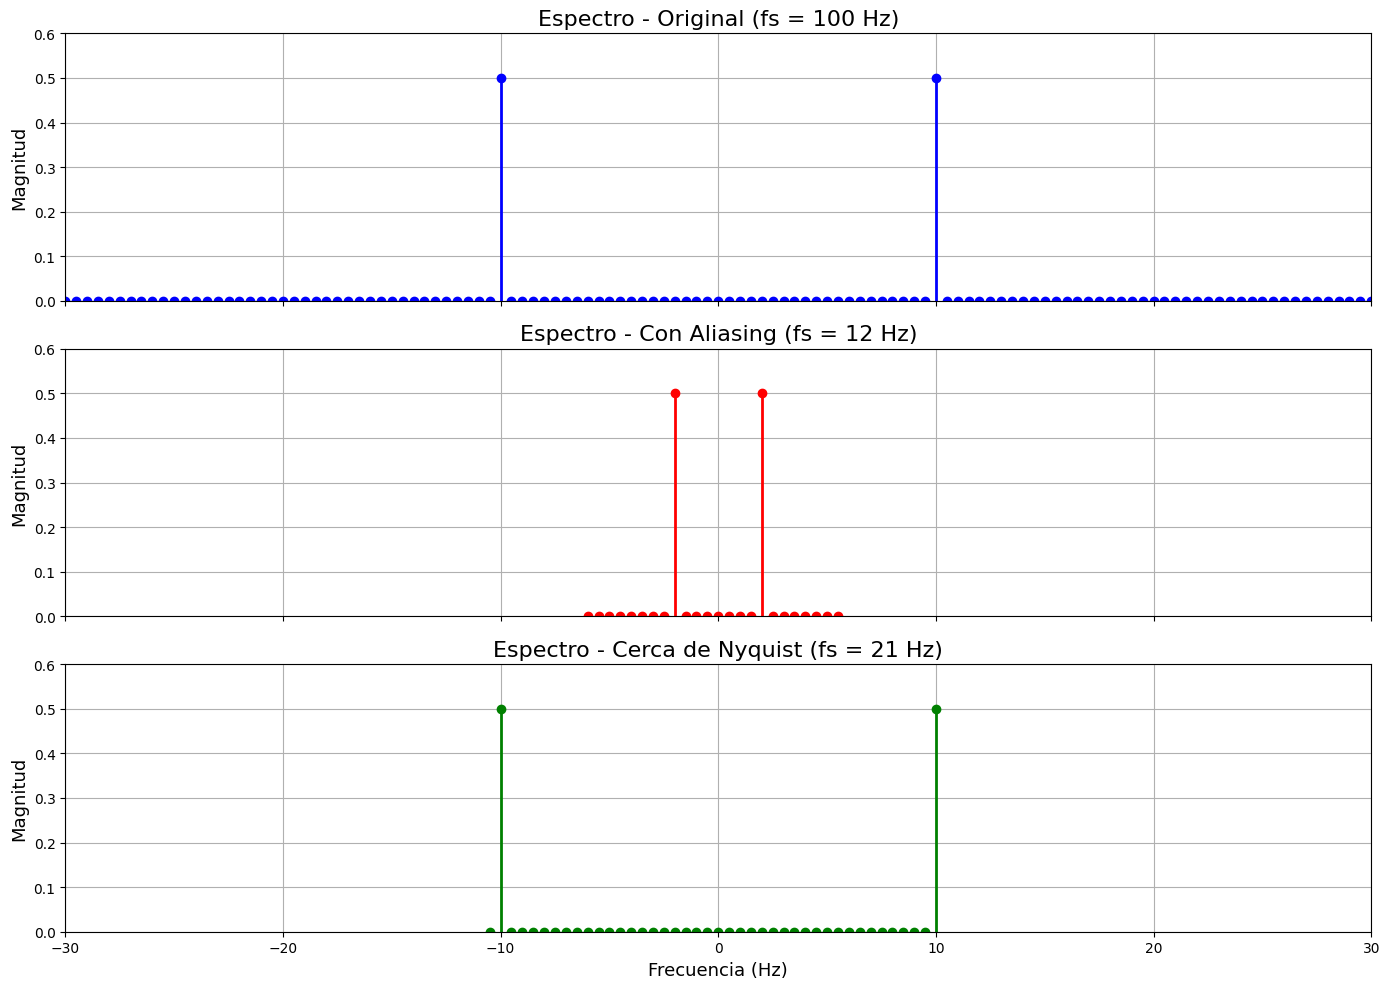

In [11]:
import numpy as np
import matplotlib.pyplot as plt

# Par치metros de la se침al
f_signal = 10  # Frecuencia de la se침al senoidal (Hz)
duration = 2  # Duraci칩n de la se침al en segundos
fs_high = 100  # Frecuencia de muestreo alta (Hz) para referencia
fs_low = 12   # Frecuencia de muestreo baja (Hz) que provocar치 aliasing
fs_nyquist = 21  # Frecuencia de muestreo apenas por encima del criterio de Nyquist

# Generar se침al continua de referencia
t_high = np.linspace(0, duration, int(fs_high * duration), endpoint=False)
signal_high = np.sin(2 * np.pi * f_signal * t_high)

# Muestreo con una frecuencia alta (sin aliasing)
t_low = np.linspace(0, duration, int(fs_low * duration), endpoint=False)
signal_low = np.sin(2 * np.pi * f_signal * t_low)

# Muestreo apenas por encima de Nyquist
t_nyquist = np.linspace(0, duration, int(fs_nyquist * duration), endpoint=False)
signal_nyquist = np.sin(2 * np.pi * f_signal * t_nyquist)

# Graficar las se침ales
plt.figure(figsize=(12, 9))

# Se침al original con muestreo alto
plt.subplot(3, 1, 1)
plt.plot(t_high, signal_high, label=f'Se침al Original (fs = {fs_high} Hz)', color='blue')
plt.scatter(t_low, signal_low, color='red', label=f'Muestreada (fs = {fs_low} Hz)')
plt.xlabel('Tiempo (s)')
plt.ylabel('Amplitud')
plt.legend()
plt.title('Se침al Senoidal y Muestreo con Aliasing')
plt.grid()

# Se침al muestreada reconstruida err칩neamente
plt.subplot(3, 1, 2)
plt.plot(t_low, signal_low, marker='o', linestyle='-', color='red', label=f'Se침al con Aliasing (fs = {fs_low} Hz)')
plt.xlabel('Tiempo (s)')
plt.ylabel('Amplitud')
plt.legend()
plt.title('Se침al Muestreada con Aliasing')
plt.grid()

# Se침al muestreada con frecuencia Nyquist
plt.subplot(3, 1, 3)
plt.plot(t_nyquist, signal_nyquist, marker='o', linestyle='-', color='green', label=f'Muestreo cerca de Nyquist (fs = {fs_nyquist} Hz)')
plt.xlabel('Tiempo (s)')
plt.ylabel('Amplitud')
plt.legend()
plt.title('Se침al Muestreada con Frecuencia Nyquist')
plt.grid()

plt.tight_layout()
plt.show()

# Agregamos un codigo para graficar los espectros

# Par치metros de se침al
f_signal = 10
duration = 2
fs_high = 100
fs_low = 12
fs_nyquist = 21

# Generar se침ales
t_high = np.linspace(0, duration, int(fs_high * duration), endpoint=False)
signal_high = np.sin(2 * np.pi * f_signal * t_high)

t_low = np.linspace(0, duration, int(fs_low * duration), endpoint=False)
signal_low = np.sin(2 * np.pi * f_signal * t_low)

t_nyquist = np.linspace(0, duration, int(fs_nyquist * duration), endpoint=False)
signal_nyquist = np.sin(2 * np.pi * f_signal * t_nyquist)

# --- Figura con 3 espectros ---
fig, axs = plt.subplots(3, 1, figsize=(14, 10), sharex=True)

def plot_spectrum(ax, signal, fs, title, color):
    n = len(signal)
    freqs = np.fft.fftfreq(n, d=1/fs)
    fft_vals = np.abs(np.fft.fft(signal)) / n
    markerline, stemlines, _ = ax.stem(freqs, fft_vals, linefmt=color, markerfmt=color+'o', basefmt=" ")
    ax.set_title(title, fontsize=16)
    ax.set_ylabel('Magnitud', fontsize=13)
    ax.grid(True)
    ax.set_xlim(-30, 30)  # Mostrar espectro sim칠trico completo
    ax.set_ylim(0, max(fft_vals) * 1.2)
    plt.setp(stemlines, linewidth=2)
    plt.setp(markerline, markersize=6)

# Graficar espectros
plot_spectrum(axs[0], signal_high, fs_high, 'Espectro - Original (fs = 100 Hz)', 'b')
plot_spectrum(axs[1], signal_low, fs_low, 'Espectro - Con Aliasing (fs = 12 Hz)', 'r')
plot_spectrum(axs[2], signal_nyquist, fs_nyquist, 'Espectro - Cerca de Nyquist (fs = 21 Hz)', 'g')

# Etiqueta eje X solo en el 칰ltimo
axs[2].set_xlabel('Frecuencia (Hz)', fontsize=13)

plt.tight_layout()
plt.show()


Viendo los primeros 3 graficos podemos entender un poco mejor como es el efecto del Aliasing al no muestrear correctamente una se침al. Como es esto ?

En el primero tenemos a la se침al senoidal correctamente muestreada siendo la fs = 100 hz y la f0 = 10 hz. En donde cumplimos con creces el criterio de nyquist. De esta manera, vemos que el muestreo nos arroja una se침al en la cual podemos apreciar correctamente la forma de una senoidal a 10 hz 

Luego, en segundo lugar tenemos un muestreo con una fs = 12 hz, en el cual vemos que la se침al muestreada no tiene el aspecto de una senoidal y al tratar de muestrearla no tenemos la informacion suficiente para poder tener una representacion fidedigna de la se침al original. Esto es el antes mencionado efecto del aliasing al muestrear una se침al 

Finalmente, que pasa si justo estamos muestreando cerca de Nyquist ? Por mas que la fs = 21hz es suficiente la reconstruccion que hacemos la muestrearla no tiene la calidad que teniamos al hacerlo con 100 hz. Si bien, podemos apreciar que se trata de uan se침al senoidal no podemos ver con claridad la forma, por lo que, la reconstruccion que hacemos tiene la informacion suficiente para saber que tenemos una senoidal. Por esto, es que se recomeinda muestrar con una frecuencia mucho mayor que la de nyquist y as칤 tener la mayor cantidad posible de informacion de la se침al original. 

Por otro lado, tambien podemos apreciar que es lo que ocurre espectralmente en donde comparamos la se침al correctamente muestreada contra los efectos del aliasing y de muestrear en Nyquist. Se puede ver que los grafivos acompa침an a las representaciones de las se침ales, por lo que, cuando tenemos una fs correcta, el espectro es como esperariamos que sea con las deltas ubicadas en las frecuencias del seno ( que como tomamos el modulo ambas son positivas ). 
Por otro lado, cuando estamos muestreando incorrectamente con una fs de 12 hz al solapar informaci칩n estamos perdiendo la forma original de la se침al lo cual tambien se puede apreciar espectralmente. 